# Task 3: Car Price Prediction!

# **Performed by Pratik Pol**


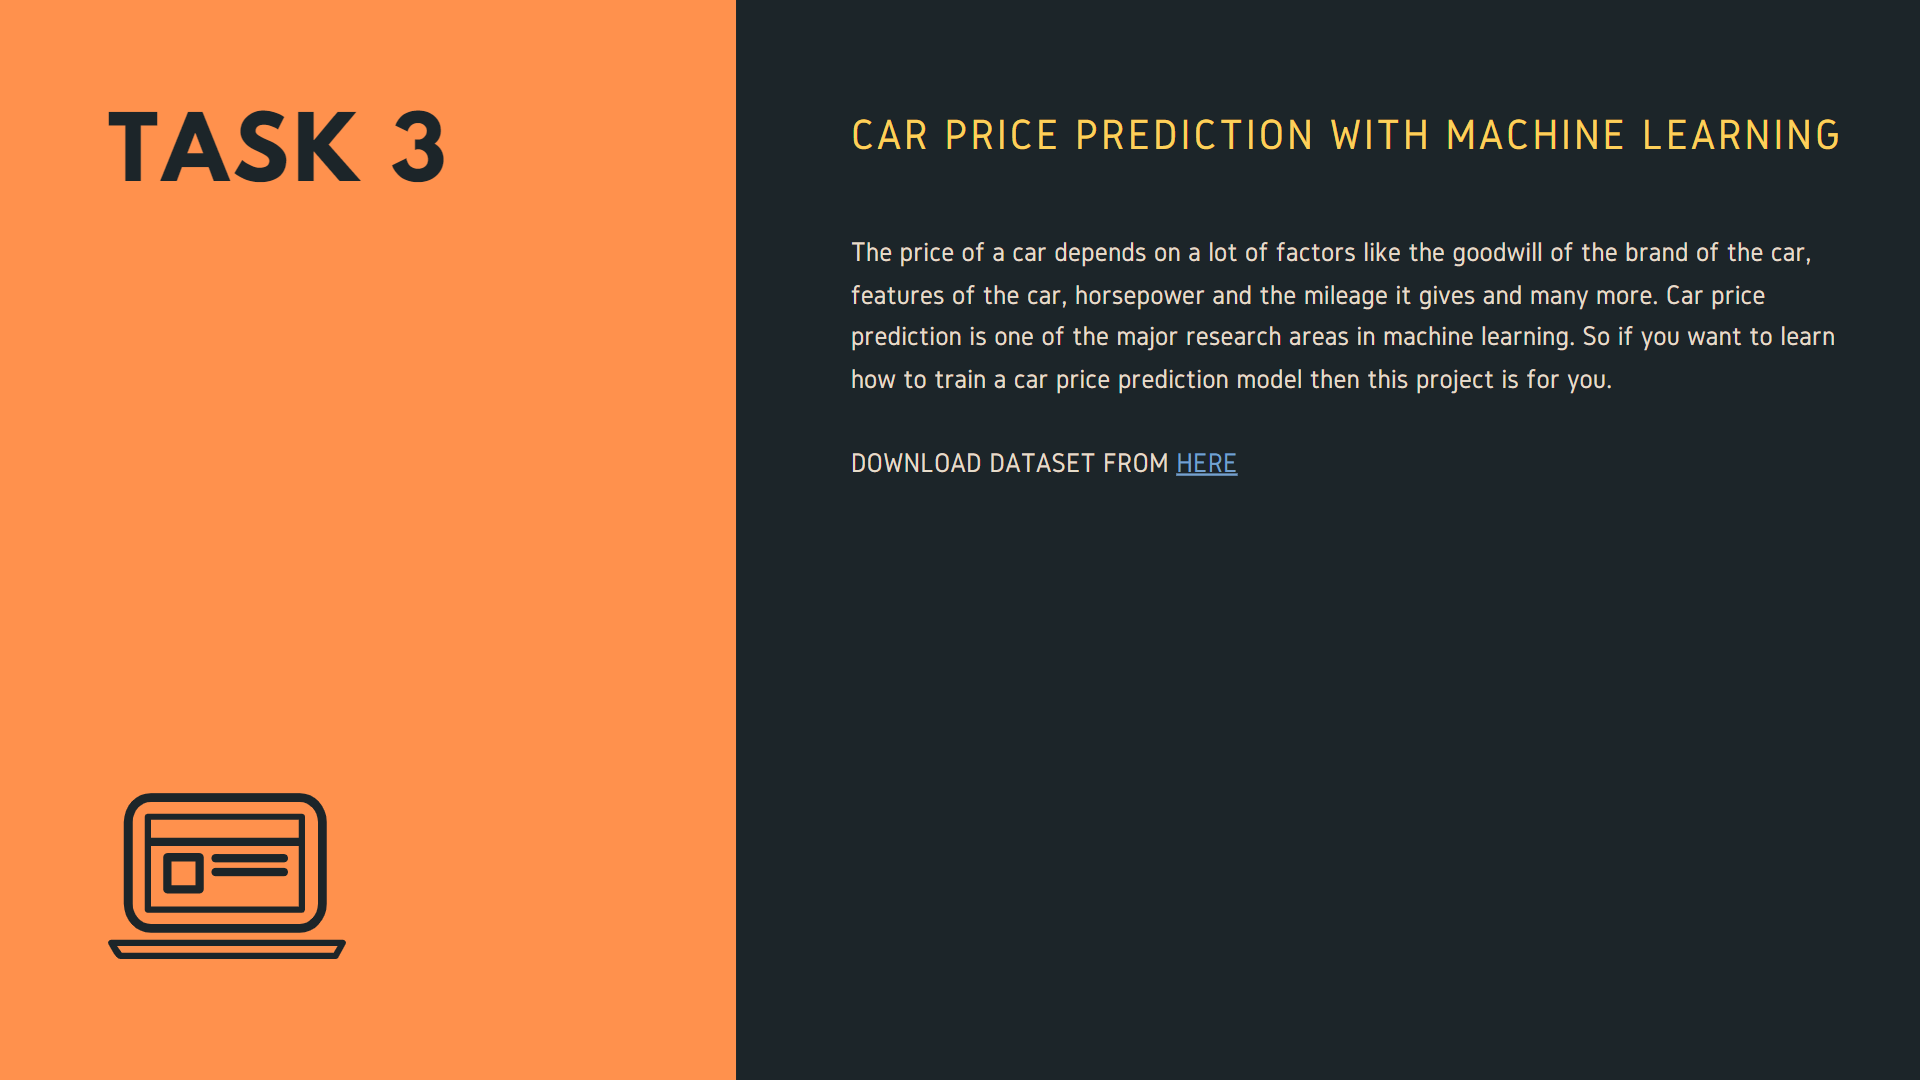

Importing Libraries!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("CarPrice.csv");
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
data.shape

(205, 26)

**Check if their is any Null values present in the data!**

In [5]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**No null values are present in the dataset!**

In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data.describe().round()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,103.0,1.0,99.0,174.0,66.0,54.0,2556.0,127.0,3.0,3.0,10.0,104.0,5125.0,25.0,31.0,13277.0
std,59.0,1.0,6.0,12.0,2.0,2.0,521.0,42.0,0.0,0.0,4.0,40.0,477.0,7.0,7.0,7989.0
min,1.0,-2.0,87.0,141.0,60.0,48.0,1488.0,61.0,3.0,2.0,7.0,48.0,4150.0,13.0,16.0,5118.0
25%,52.0,0.0,94.0,166.0,64.0,52.0,2145.0,97.0,3.0,3.0,9.0,70.0,4800.0,19.0,25.0,7788.0
50%,103.0,1.0,97.0,173.0,66.0,54.0,2414.0,120.0,3.0,3.0,9.0,95.0,5200.0,24.0,30.0,10295.0
75%,154.0,2.0,102.0,183.0,67.0,56.0,2935.0,141.0,4.0,3.0,9.0,116.0,5500.0,30.0,34.0,16503.0
max,205.0,3.0,121.0,208.0,72.0,60.0,4066.0,326.0,4.0,4.0,23.0,288.0,6600.0,49.0,54.0,45400.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**We can observe that their are eight columns with float datatype and ten columns with object datatype!**

In [9]:
data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

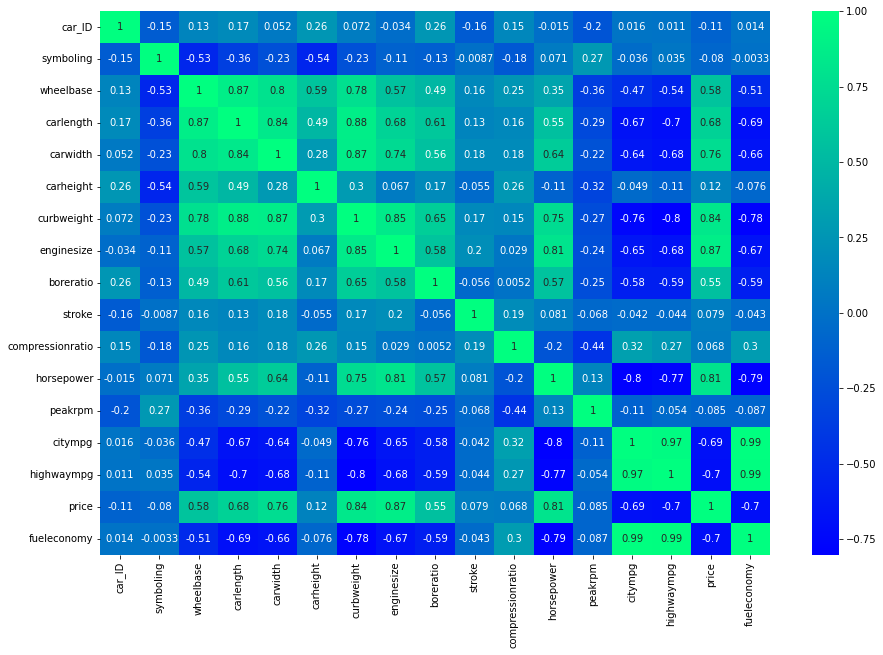

In [32]:
cm = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cm,annot=True,cmap='winter')

**visualizing the correlation of numerical data with the help of heapmap!**

In [11]:
data.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
96,97,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.290,9.40,69,5200,31,37,7499.0
118,119,1,plymouth fury iii,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.230,9.40,68,5500,37,41,5572.0
132,133,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.070,9.31,110,5250,21,28,11850.0
27,28,1,dodge coronet custom,gas,turbo,two,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.390,7.60,102,5500,24,30,8558.0
162,163,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.030,9.00,70,4800,28,34,9258.0
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.110,10.00,288,5750,17,28,31400.5
56,57,3,mazda glc,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.33,3.255,9.40,101,6000,17,23,11845.0
93,94,1,nissan titan,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.290,9.40,69,5200,31,37,7349.0
108,109,0,peugeot 304,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.520,21.00,95,4150,28,33,13200.0
80,81,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,96.3,...,110,spdi,3.17,3.460,7.50,116,5500,23,30,9959.0


In [12]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [14]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [15]:
CompanyName=data['CarName'].apply(lambda x: x.split(' ')[0])
data.insert(3,'CompanyName',CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


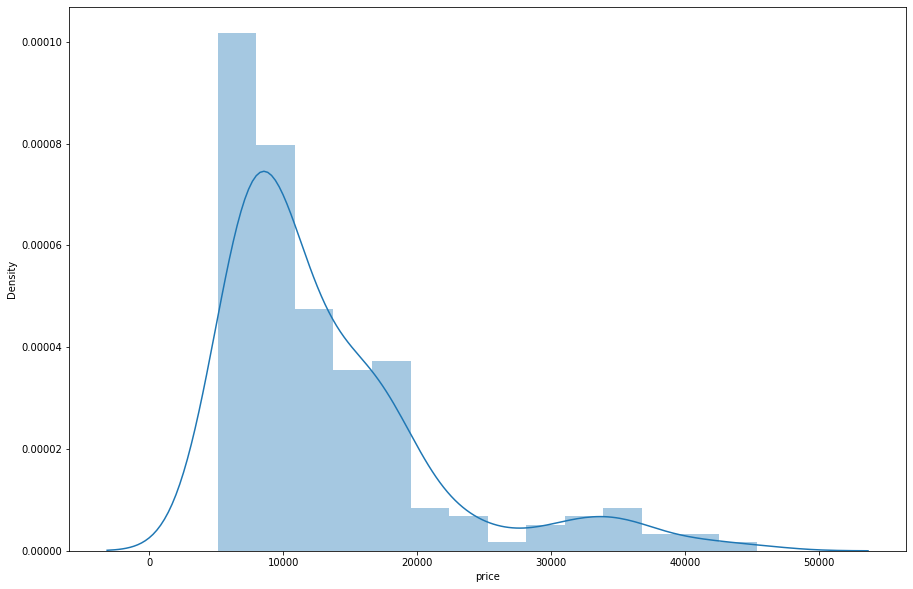

In [16]:
plt.figure(figsize=(15, 10))
sns.distplot(data['price'])
plt.show()

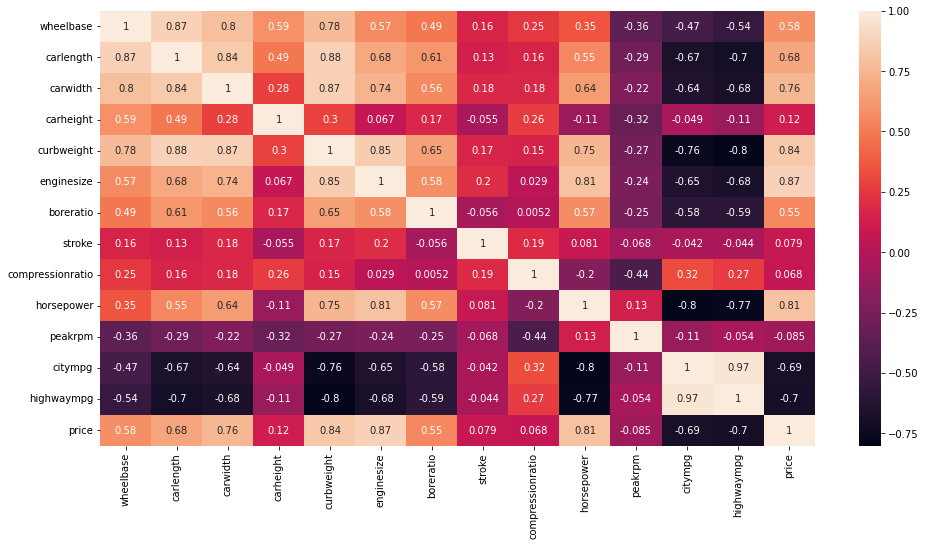

In [17]:
plt.figure(figsize=(16,8))

data1 = data.select_dtypes(include=['float64', 'int'])
data1 = data1.drop(['symboling', 'car_ID'], axis=1)
data1 = data1.corr()

sns.heatmap(data1,annot=True)
plt.show()

In [21]:
data.sample(10)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
70,71,-1,buick,diesel,turbo,four,sedan,rwd,front,115.6,...,3.58,3.640,21.5,123,4350,22,25,31600,23.35,Highend
126,127,3,porcshce,gas,std,two,hardtop,rwd,rear,89.5,...,3.74,2.900,9.5,207,5900,17,25,32528,20.60,Highend
58,59,3,mazda,gas,std,two,hatchback,rwd,front,95.3,...,3.33,3.255,9.4,135,6000,16,23,15645,19.15,Medium
51,52,1,maxda,gas,std,two,hatchback,fwd,front,93.1,...,3.03,3.150,9.0,68,5000,31,38,6095,34.15,Budget
150,151,1,toyota,gas,std,two,hatchback,fwd,front,95.7,...,3.05,3.030,9.0,62,4800,35,39,5348,36.80,Budget
130,131,0,renault,gas,std,four,wagon,fwd,front,96.1,...,3.46,3.900,8.7,90,5100,23,31,9295,26.60,Budget
54,55,1,mazda,gas,std,four,sedan,fwd,front,93.1,...,3.08,3.150,9.0,68,5000,31,38,7395,34.15,Medium
75,76,1,mercury,gas,turbo,two,hatchback,rwd,front,102.7,...,3.78,3.120,8.0,175,5000,19,24,16503,21.25,Medium
157,158,0,toyota,gas,std,four,hatchback,fwd,front,95.7,...,3.19,3.030,9.0,70,4800,30,37,7198,33.15,Budget
190,191,3,vw,gas,std,two,hatchback,fwd,front,94.5,...,3.19,3.400,8.5,90,5500,24,29,9980,26.25,Medium


In [20]:
data['fueleconomy'] = (0.55 * data['citympg']) + (0.45 * data['highwaympg'])
data['price'] = data['price'].astype('int')
temp = data.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
data['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [22]:
cars_lr = data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [23]:
def preds(x,data):
    temp = pd.get_dummies(data[x], drop_first = True)
    data = pd.concat([data, temp], axis = 1)
    data.drop([x], axis = 1, inplace = True)
    return data

In [24]:
cars_lr = preds('fueltype',cars_lr)
cars_lr = preds('aspiration',cars_lr)
cars_lr = preds('carbody',cars_lr)
cars_lr = preds('drivewheel',cars_lr)
cars_lr = preds('enginetype',cars_lr)
cars_lr = preds('cylindernumber',cars_lr)
cars_lr = preds('carsrange',cars_lr)

In [25]:
y=cars_lr.pop('price')
X=cars_lr

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [26]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [27]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [30]:
from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred))

R2 score:  0.8844934317665444


**Conclusion: Here we got 88.44% of accuracy by using Linear Regression**